In [2]:
import os
import pandas as pd
import numpy as np
import os
import csv
import pandas as pd
import numpy as np 
from sklearn.utils import resample
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB


# Time Series Classication
An interesting task in machine learning is classication of time series. In this problem,
we will classify the activities of humans based on time series obtained by a Wireless
Sensor Network.
# (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/
Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\
%29 . The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple les each of which represents an instant of a human
performing an activity. Each le containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13,
vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains
6 time series and each time series has 480 consecutive values.
# Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data.

# Feature Extraction
Classication of time series usually needs extracting features from them. In this
problem, we focus on time-domain features.
i. Research what types of time-domain features are usually used in time series
classication and list them (examples are minimum, maximum, mean, etc).
ii. Extract the time-domain features minimum, maximum, mean, median, standard
deviation, rst quartile, and third quartile for all of the 6 time series
in each instance. You are free to normalize/standardize features or use them
directly.1



Answer 1)
Some of the time-domain features:

#### Number of positive/negative peaks in a time series
#### Coefficient of Kurtosis
#### Coefficient of Skewness
#### Mean value of the time series
#### Maximum value of the time series
#### Median value of the time series
#### Autoregressive component of the time series
#### Moving average component of the time series
#### Range of the time series



In [697]:
#,'bending2','cycling','lying','sitting','standing','walking']
df = pd.read_csv("D:/Machine_learning_INF_552/Homework 03/AReM-Copy(2)/bending1/dataset1.csv",skiprows=4)
a = pd.DataFrame(df["var_rss12"])

mini = np.median(a)



dataset = {}

counter =0
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","min","max","median","qua1","qua3","std"] 
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []
    
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'D:\Machine_learning_INF_552\Homework 03\AReM-Copy(2)\{0}'.format(activity)
    for filename in os.listdir(path):
       
        path1 = 'D:\Machine_learning_INF_552\Homework 03\AReM-Copy(2)\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))    
        for col in column:
            a = pd.DataFrame(df[col])
            dataset[col+"_"+"mean"].append(np.mean(a)[col])
            dataset[col+"_"+"min"].append(np.min(a)[col])
            dataset[col+"_"+"max"].append(np.max(a)[col])
            dataset[col+"_"+"median"].append(np.median(a))
            dataset[col+"_"+"qua1"].append(np.quantile(a,0.25))
            
            dataset[col+"_"+"qua3"].append(np.quantile(a,0.75))
            dataset[col+"_"+"std"].append(np.std(a)[col])
            
df = pd.DataFrame.from_dict(dataset)           
df
        

,avg_rss12_mean,avg_rss12_min,avg_rss12_max,avg_rss12_median,avg_rss12_qua1,avg_rss12_qua3,avg_rss12_std,var_rss12_mean,var_rss12_min,var_rss12_max,...,avg_rss23_qua1,avg_rss23_qua3,avg_rss23_std,var_rss23_mean,var_rss23_min,var_rss23_max,var_rss23_median,var_rss23_qua1,var_rss23_qua3,var_rss23_std
0,40.624792,37.25,45.00,40.500,39.2500,42.0000,1.475428,0.358604,0.0,1.30,...,33.0000,36.0000,2.186168,0.570583,0.00,1.92,0.430,0.0000,1.3000,0.582308
1,42.812812,38.00,45.67,42.500,42.0000,43.6700,1.434054,0.372438,0.0,1.22,...,32.0000,34.5000,1.993175,0.571083,0.00,3.11,0.430,0.0000,1.3000,0.600383
2,43.954500,35.00,47.40,44.330,43.0000,45.0000,1.557210,0.426250,0.0,1.70,...,35.3625,36.5000,1.997520,0.493292,0.00,1.79,0.430,0.0000,0.9400,0.512971
3,42.179813,33.00,47.75,43.500,39.1500,45.0000,3.666840,0.696042,0.0,3.00,...,30.4575,36.3300,3.845436,0.613521,0.00,2.18,0.500,0.0000,1.0000,0.523771
4,41.678063,33.00,45.75,41.750,41.3300,42.7500,2.241152,0.535979,0.0,2.83,...,28.4575,31.2500,2.408514,0.383292,0.00,1.79,0.430,0.0000,0.5000,0.388759
5,43.454958,37.00,48.00,43.250,42.5000,45.0000,1.384653,0.378083,0.0,1.58,...,22.2500,24.0000,2.486268,0.679646,0.00,5.26,0.500,0.4300,0.8700,0.621885
6,43.969125,36.25,48.00,44.500,43.3100,44.6700,1.616677,0.413125,0.0,1.50,...,20.5000,23.7500,3.314843,0.555313,0.00,2.96,0.490,0.0000,0.8300,0.487318
7,24.562958,12.75,51.00,24.250,23.1875,26.5000,3.733619,0.590833,0.0,6.87,...,20.5000,27.0000,3.689936,0.700188,0.00,4.97,0.500,0.4300,0.8700,0.692997
8,27.464604,0.00,42.75,28.000,25.5000,30.0000,3.579847,0.449708,0.0,7.76,...,15.0000,20.7500,5.048375,1.122125,0.00,6.76,0.830,0.4700,1.3000,1.011287
9,32.586208,21.00,50.00,33.000,26.1875,34.5000,6.231642,0.516125,0.0,9.90,...,17.6700,23.5000,5.027179,1.162042,0.00,13.61,0.830,0.4700,1.3000,1.331591


# Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python's bootstrapped or any other
method to build a 90% bootsrap condence interval for the standard deviation
of each feature.

### We calculated the standard deviation for the each time domain and listed the values as below

In [698]:
standard = df.std()
standard = pd.DataFrame(standard)
rename = ["Standard Deviation"]
standard.columns = rename
standard

,Standard Deviation
avg_rss12_mean,5.335718
avg_rss12_min,9.569975
avg_rss12_max,4.394362
avg_rss12_median,5.440054
avg_rss12_qua1,6.153590
avg_rss12_qua3,5.138925
avg_rss12_std,1.770306
var_rss12_mean,1.574164
var_rss12_min,0.000000
var_rss12_max,5.062729


### Bootstraping

In [699]:

confmin ={}
confmax={}
for co in df.columns.tolist():
    boot = []
    for i in range (0,1000):
        subset = resample(df[co],n_samples=88)
        boot.append(np.std(subset))
    boot.sort()
    confmin[co]=boot[49]
    confmax[co]=boot[949]

        
    
    
        

In [700]:
confmindf = pd.DataFrame.from_dict(confmin, orient='index')
rename1 = ['confidence interval lower']
confmaxdf = pd.DataFrame.from_dict(confmax, orient='index')
rename2 = ['confidence interval higher']

In [701]:
confmindf.columns = rename1
confmaxdf.columns = rename2

In [702]:
final = standard.join(confmindf)

In [703]:
final = final.join(confmaxdf)

### Below is the Table for the confindance interval. All the values of the standard deviation lie between the higher and lower confidance interval
### We have taken the  5% interval on both sides 


In [704]:
final

,Standard Deviation,confidence interval lower,confidence interval higher
avg_rss12_mean,5.335718,4.672088,5.864748
avg_rss12_min,9.569975,8.210305,10.670908
avg_rss12_max,4.394362,3.249773,5.256595
avg_rss12_median,5.440054,4.768326,5.952806
avg_rss12_qua1,6.153590,5.541592,6.600788
avg_rss12_qua3,5.138925,4.298673,5.839255
avg_rss12_std,1.770306,1.555936,1.941468
var_rss12_mean,1.574164,1.397560,1.697725
var_rss12_min,0.000000,0.000000,0.000000
var_rss12_max,5.062729,4.616642,5.359607


# Use your judgement to select the three most important time-domain features
(one option may be min, mean, and max).


Maximum value - To capture the maximum value of the time series
Median value - To capture central tendancy and outliers can be accomodated
Mean - Will give aggregated value for the dataset

## Q D1 Assume that you want to use the training set to classify bending from other
## activities, i.e. you have a binary classification problem. Depict scatter plots
## of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
## each instance, and use color to distinguish bending vs. other activities. (See
## p. 129 of the textbook).

In [705]:
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","min","max","median","qua1","qua3","std"] 
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []
    
dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}'.format(activity)
    for filename in os.listdir(path):
        counter = counter+1
        path1 = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))    
        for col in column:
            a = pd.DataFrame(df[col])
            dataset[col+"_"+"mean"].append(np.mean(a)[col])
            dataset[col+"_"+"min"].append(np.min(a)[col])
            dataset[col+"_"+"max"].append(np.max(a)[col])
            dataset[col+"_"+"median"].append(np.median(a))
            dataset[col+"_"+"qua1"].append(np.quantile(a,0.25))
           
            dataset[col+"_"+"qua3"].append(np.quantile(a,0.75))
            dataset[col+"_"+"std"].append(np.std(a)[col])
        dataset["activity"].append(activity)
df1 = pd.DataFrame.from_dict(dataset)

In [706]:
cols = [col for col in df1.columns.tolist() if ((col.startswith('avg_rss12') or col.startswith('var_rss12') or col.startswith('var_rss23')) and (col.endswith('max') or col.endswith('median')or col.endswith('mean')) or col == 'activity')]

In [707]:
dfd1 =df1[cols] 

In [708]:
dfd1['activity'] = np.where(((dfd1['activity'] == 'bending1')|(dfd1['activity'] == 'bending2')),'bending','others')
        

C:\Users\Chinmay Itagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [709]:
temp=pd.DataFrame()
j = 0
k = 1
for colt in dfd1.columns.tolist()[:-1]:
    for i in range(0,69):
        temp.loc[j,'val'] = dfd1.loc[i,colt]
        temp.loc[j,'col'] = str(k)
        j = j + 1
    k = k + 1


In [710]:
j = 0
for i in range(0,621):
    temp.loc[i,'activity'] = dfd1.loc[j,'activity']
    j = j + 1
    if j == 69:
        j=0

In [711]:
temp['activity_int'] = np.where(temp['activity'] == 'bending',1,0)

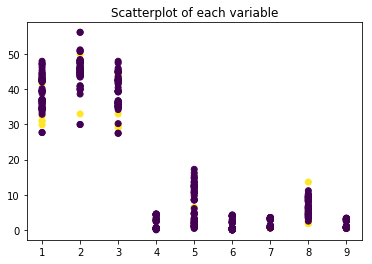

In [712]:
a=plt.scatter(temp['col'],temp['val'],c=temp['activity_int'])
plt.title('Scatterplot')
plt.show()

### The yellow dots represent the bending data and the purpule dots represent the other than bending

In [713]:

#number_of_rows = (dfd1.shape)
#half_of_rows = number_of_rows[0]/2
#half_of_rows = math.floor(half_of_rows)
#half_of_rows

#df1half=dfd1[0:half_of_rows+1]


#df2half=dfd1[half_of_rows:]

#df1half = pd.DataFrame(df1half.iloc[:,0:-1])

#df2half.index = df2half.index - 34

#rename3 = ["avg_rss12_mean2","avg_rss12_min2","avg_rss12_max2","var_rss12_mean2","var_rss12_min2","var_rss12_max2","var_rss23_mean2","var_rss23_min2","var_rss23_max2","activity"]
#df2half.columns=rename3

#df12tseries= df1half.join(df2half)

#df12tseries.shape

## Q.D2 Break each time series in your training set into two (approximately) equal
## length time series. Now instead of 6 time series for each of the 88 instances,
## you have 12 time series for each instance. Repeat the experiment in 1(d)i.
## Do you see any considerable differenece in the results with those of 1(d)i?

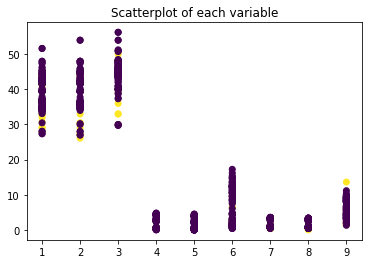

[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      32.25       5.76      14.00       4.36      18.00   
1                250      37.75       5.07      15.50       3.20      14.75   
2                500      34.50       2.60      20.00       4.74      20.50   
3                750      23.75       5.36      11.75       6.22      14.25   
4               1000      41.25       3.77      15.00       6.63      11.50   
5               1250      36.75       1.30      13.50       3.35      15.00   
6               1500      37.00       1.22      17.50       4.92      12.50   
7               1750      38.50       7.09      11.50       6.80      16.00   
8               2000      27.50       6.42      16.33       2.62      14.67   
9               2250      26.00       3.61      15.75       2.95      14.25   
10              2500      40.33       1.25      14.75       2.17      15.00   
11              2750      35.00       1.22      17.

In [714]:
dataset={}
column = ["avg_rss12","var_rss12","var_rss23"]
parameter = ["mean","median","max"] 
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []
    
dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}'.format(activity)
    for filename in os.listdir(path):
        counter = counter+1
        path1 = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
        dfsplit = np.array_split(df,2)
        for l in dfsplit:
            for coll in column:
                dataset[coll+"_"+"mean"].append(np.mean(l[coll]))
                dataset[coll+"_"+"median"].append(np.median(l[coll]))
                dataset[coll+"_"+"max"].append(np.max(l[coll]))
            dataset["activity"].append(activity)


dfd2 = pd.DataFrame(dataset)
dfd2['activity'] = np.where(((dfd2['activity'] == 'bending1')|(dfd2['activity'] == 'bending2')),'bending','others')
temp=pd.DataFrame()
j = 0
k = 1
for colt in dfd2.columns.tolist()[:-1]:
    for i in range(0,138):
        temp.loc[j,'val'] = dfd2.loc[i,colt]
        temp.loc[j,'col'] = str(k)
        j = j + 1
    k = k + 1
j = 0
for i in range(0,1242):
    temp.loc[i,'activity'] = dfd2.loc[j,'activity']
    j = j + 1
    if j == 138:
        j=0
temp['activity_int'] = np.where(temp['activity'] == 'bending',1,0)
a=plt.scatter(temp['col'],temp['val'],c=temp['activity_int'])
plt.title('Scatterplot of each variable')
plt.show()        


### The yellow dots represent the bending and the purple plots represents other than bending
### Form the above plot we can see that there is not much difference if we split the data into two parts

In [715]:
dfd2.shape

(138, 10)

### D3 Break each time series in your training set into l 2 f1; 2; : : : ; 20g time series
### of approximately equal length and use logistic regression4 to solve the binary
### classification problem, using time-domain features. Calculate the p-values for
### your logistic regression parameters and refit a logistic regression model using
### your pruned set of features.5 Alternatively, you can use backward selection
### using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine
### the best value of l. Explain what the right way and the wrong way
### are to perform cross-validation in this problem.6 Obviously, use the right
### way! Also, you may encounter the problem of class imbalance, which may
### make some of your folds not having any instances of the rare class. In such a
### case, you can use stratified cross validation. Research what it means and use
### it if needed.
### In the following, you can see an example of applying Python's Recursive
### Feature Elimination, which is a backward selection algorithm, to logistic regression.

### Finding the features after the cross validation is the wrong way. We have to do the feature selection while performing the cross validation. We have used the RFECV for doing the feature selection 

In [3]:

d1 = {}
indexmax={}
thetrainindex={}
thevalindex={}

aucs = {}
aucs1={}
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"] 
for it in range(1,21):
    dataset={}
    for x in column:
        for p in parameter:
            dataset[x+"_"+p] = []
    

    dataset["activity"] = []
    for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}'.format(activity)
        for filename in os.listdir(path):
            
            path1 = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}\{1}'.format(activity,filename)
            df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
            split = np.array_split(df,it)
            for l in split:
                for coll in column:
                    dataset[coll+"_"+"mean"].append(np.mean(l[coll]))
                    dataset[coll+"_"+"median"].append(np.min(l[coll]))
                    dataset[coll+"_"+"max"].append(np.max(l[coll]))
                dataset["activity"].append(activity)
    dfd3 = pd.DataFrame(dataset)
    dfd3['activity'] = np.where(((dfd3['activity'] == 'bending1')|(dfd3['activity'] == 'bending2')),'bending','others')  
    #dfd3 = dfd3.sample(frac=1,random_state=145).reset_index(drop=True)
    X = dfd3.loc[:,dfd3.columns!='activity']
    y = dfd3['activity']
    
    
    aucd1= []
    bestf = []
    trainindex=[]
    validindex=[]
    
    kf = StratifiedKFold(n_splits=5)
    for tindex,validationindex in kf.split(X,y):
        xtrain, xval = X.iloc[tindex.tolist(),:], X.iloc[validationindex.tolist(),:]
        ytrain, yval = y[tindex.tolist()], y[validationindex.tolist()]
        
        model = LogisticRegression()
        refd = RFECV(estimator=model ,cv= StratifiedKFold(5), scoring='accuracy')
        feature = refd.fit(xtrain,ytrain).ranking_==1
        xtrain=xtrain.loc[:,feature]
        xval=xval.loc[:,feature]
        model = model.fit(xtrain, ytrain)
        actual = [1 if i == 'bending' else 0 for i in yval.tolist()]
        predicted = [1 if i == 'bending' else 0 for i in model.predict(xval).tolist()]
        fprd1, tprd1, _ = roc_curve(actual,predicted)
        aucd1.append(auc(fprd1, tprd1))
        bestf.append(xtrain.columns)
        trainindex.append(tindex)
        validindex.append(validationindex)
    
    d1[it] = np.mean(aucd1)
    indexmax[it] = bestf[np.argmax(aucd1)]
    thetrainindex[it] = trainindex[np.argmax(aucd1)] 
    thevalindex[it] = validindex[np.argmax(aucd1)]

In [4]:
indexmax

{1: Index(['avg_rss12_mean', 'avg_rss12_median', 'avg_rss12_max', 'var_rss12_mean',
        'var_rss12_median', 'var_rss12_max', 'avg_rss13_mean',
        'avg_rss13_median', 'avg_rss13_max', 'var_rss13_mean',
        'var_rss13_median', 'var_rss13_max', 'avg_rss23_mean',
        'avg_rss23_median', 'avg_rss23_max', 'var_rss23_mean',
        'var_rss23_median', 'var_rss23_max'],
       dtype='object'),
 2: Index(['avg_rss12_mean', 'avg_rss12_median', 'avg_rss12_max', 'var_rss12_mean',
        'var_rss12_median', 'var_rss12_max', 'avg_rss13_mean',
        'avg_rss13_median', 'avg_rss13_max', 'var_rss13_mean',
        'var_rss13_median', 'var_rss13_max', 'avg_rss23_mean',
        'avg_rss23_median', 'avg_rss23_max', 'var_rss23_mean',
        'var_rss23_median', 'var_rss23_max'],
       dtype='object'),
 3: Index(['avg_rss12_mean', 'var_rss12_mean', 'avg_rss13_mean', 'avg_rss13_max',
        'var_rss13_mean', 'var_rss13_max', 'avg_rss23_mean', 'avg_rss23_max',
        'var_rss23_max'],
  

In [5]:
l1 = pd.DataFrame(d1,index=[0])
l1= l1.T
l1['L'] = l1.index
l1.rename(columns={0:'Mean AUC across the folds'},inplace=True)
l1 = l1[['L','Mean AUC across the folds']]
l1

,L,Mean AUC across the folds
1,1,0.950000
2,2,0.900000
3,3,0.753333
4,4,0.838095
5,5,0.785556
6,6,0.860732
7,7,0.750275
8,8,0.815030
9,9,0.770139
10,10,0.833889


## D4 Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression  as well as the p-values associated with them.

In [6]:
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"]
dataset={}
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []

dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}'.format(activity)
    for filename in os.listdir(path):
       
        path1 = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
        #df = pd.DataFrame(df)
            
           
        for coll in column:
            dataset[coll+"_"+"mean"].append(np.mean(df[coll]))
            dataset[coll+"_"+"median"].append(np.median(df[coll]))
            dataset[coll+"_"+"max"].append(np.max(df[coll]))
        dataset["activity"].append(activity)
dfd3 = pd.DataFrame(dataset)
dfd3['activity'] = np.where(((dfd3['activity'] == 'bending1')|(dfd3['activity'] == 'bending2')),'bending','others')  
#dfd3 = dfd3.sample(frac=1,random_state=123).reset_index(drop=True)
X = dfd3[indexmax[3]]
y = dfd3['activity']


,avg_rss12_mean,var_rss12_mean,avg_rss13_mean,avg_rss13_max,var_rss13_mean,var_rss13_max,avg_rss23_mean,avg_rss23_max,var_rss23_max
0,43.954500,0.426250,22.122354,29.75,0.497313,4.44,35.588458,38.50,1.79
1,42.179813,0.696042,22.183625,30.00,0.989917,5.15,33.493917,38.67,2.18
2,41.678063,0.535979,19.006562,28.25,0.841875,6.42,29.857083,37.50,1.79
3,43.454958,0.378083,15.793333,27.00,0.849354,10.03,23.034792,33.50,5.26
4,43.969125,0.413125,15.868021,26.33,0.666354,5.17,22.103750,30.75,2.96
5,32.586208,0.516125,13.941625,28.25,0.868896,7.40,20.345708,33.75,13.61
6,29.881938,0.256438,8.166250,14.50,0.544646,4.44,18.117896,23.25,6.40
7,30.938104,0.467167,14.589833,32.75,0.777542,11.42,18.389083,36.00,6.73
8,31.058250,0.405458,15.296667,28.33,0.823542,5.32,14.407187,40.33,4.92
9,36.819521,2.600146,15.302625,25.00,2.937021,10.61,17.296271,24.67,8.99


In [7]:
xtrainx, xvalx = X.loc[thetrainindex[1].tolist(),:], X.loc[thevalindex[1].tolist(),:]
ytrainy, yvaly = y[thetrainindex[1].tolist()], y[thevalindex[1].tolist()]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
model = LogisticRegression()
model = model.fit(xtrainx, ytrainy)
act = [1 if i == 'bending' else 0 for i in yvaly.tolist()]
pred = [1 if i == 'bending' else 0 for i in model.predict(xvalx).tolist()]
fprd1, tprd1, _ = roc_curve(act,pred)
print(auc(fprd1, tprd1))
conf = metrics.confusion_matrix(act,pred)
print(conf)

1.0
[[12  0]
 [ 0  2]]


In [11]:
# coeficients
coef=pd.DataFrame()
coef = model.coef_
coefdf = pd.DataFrame(xtrainx.columns)
coefdf.columns=["selected features"]
coef = pd.DataFrame(coef).T
coef.columns=["coeficients"]
coef = coefdf.join(coef)


In [12]:
coef

,selected features,coeficients
0,avg_rss12_mean,0.596069
1,var_rss12_mean,0.126098
2,avg_rss13_mean,0.443344
3,avg_rss13_max,0.028653
4,var_rss13_mean,0.122269
5,var_rss13_max,0.024847
6,avg_rss23_mean,-0.848195
7,avg_rss23_max,-0.599764
8,var_rss23_max,0.569948


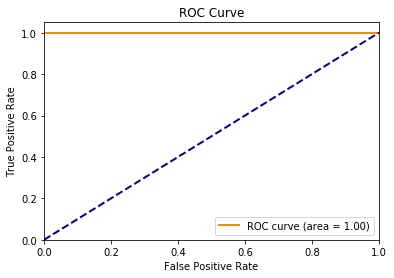

In [13]:

fpr, tpr, _ = roc_curve(act,pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()






In [15]:
a,b = chi2(xtrainx,ytrainy)
print("p - values ")
print(b)

p - values 
[1.54491346e-01 3.41472802e-02 3.25267232e-01 2.73227921e-03
 2.55994395e-01 2.87535734e-01 4.72371805e-06 3.24910821e-09
 8.94028370e-01]


## D5 Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

### The model is accurate and has the AUC = 1 

In [24]:

column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"]
dataset={}
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []

dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'AReMtrain\{0}'.format(activity)
    for filename in os.listdir(path):
        
        path1 = 'AReMtrain\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
                   
        for coll in column:
            dataset[coll+"_"+"mean"].append(np.mean(df[coll]))
            dataset[coll+"_"+"median"].append(np.median(df[coll]))
            dataset[coll+"_"+"max"].append(np.max(df[coll]))
        dataset["activity"].append(activity)
train = pd.DataFrame(dataset)
train['activity'] = np.where(((train['activity'] == 'bending1')|(train['activity'] == 'bending2')),'bending','others')  
trainx = train[indexmax[3]]
trainy= train['activity']

# test

column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"]
dataset={}
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []

dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'AReMtest\{0}'.format(activity)
    for filename in os.listdir(path):
        
        path1 = 'AReMtest\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
                   
        for coll in column:
            dataset[coll+"_"+"mean"].append(np.mean(df[coll]))
            dataset[coll+"_"+"median"].append(np.median(df[coll]))
            dataset[coll+"_"+"max"].append(np.max(df[coll]))
        dataset["activity"].append(activity)
test = pd.DataFrame(dataset)
test['activity'] = np.where(((test['activity'] == 'bending1')|(test['activity'] == 'bending2')),'bending','others')  
#dfd3['activity'] = np.where(((dfd3['activity'] == 'bending1')|(dfd3['activity'] == 'bending2')),'bending','others')  
#dfd3 = dfd3.sample(frac=1,random_state=123).reset_index(drop=True)
testx = test[indexmax[3]]
testy= test['activity']


In [25]:
model = LogisticRegression()
model = model.fit(trainx, trainy)
act1 = [1 if i == 'bending' else 0 for i in testy.tolist()]
pred1 = [1 if i == 'bending' else 0 for i in model.predict(testx).tolist()]
fprd2, tprd2, _ = roc_curve(act1,pred1)
print("AUC for the test set")
print(auc(fprd1, tprd1))
print("Confusion Matrix")
conf = metrics.confusion_matrix(act1,pred1)
print(conf)

AUC for the test set
1.0
[[15  0]
 [ 0  4]]


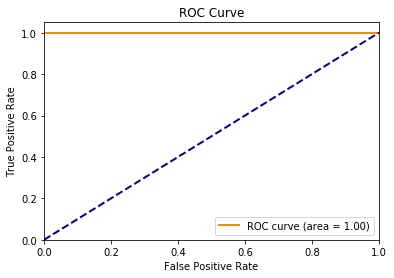

In [23]:
print("Class Imbalanced")
fpr2, tpr2, _ = roc_curve(act1,pred1)
roc_auc = auc(fpr2, tpr2)
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()






# D6 Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?

Ans - No the classes are not well seperated a we can see that bending data is very less compared to other data. Hence we can see class imbalance is evident.


# D7From the confusion matrices you obtained, do you see imbalanced classes?
If yes, build a logistic regression model based on case-control sampling and
adjust its parameters. Report the confusion matrix, ROC, and AUC of the
model.

In [26]:
model = LogisticRegression(class_weight='balanced')
model = model.fit(trainx, trainy)
act1 = [1 if i == 'bending' else 0 for i in testy.tolist()]
pred1 = [1 if i == 'bending' else 0 for i in model.predict(testx).tolist()]
fprd2, tprd2, _ = roc_curve(act1,pred1)
print("AUC for the test set")
print(auc(fprd1, tprd1))
print("Confusion Matrix")
conf = metrics.confusion_matrix(act1,pred1)
print(conf)

AUC for the test set
1.0
Confusion Matrix
[[15  0]
 [ 0  4]]


Class balanced


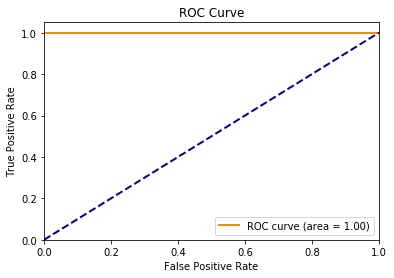

In [28]:
print("Class balanced")
fpr2, tpr2, _ = roc_curve(act1,pred1)
roc_auc = auc(fpr2, tpr2)
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Binary Classification Using L1-penalized logistic regression
i. Repeat 1(d)iii using L1-penalized logistic regression,7 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and , the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for  automatically.8 ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [813]:
aucs = {}
aucs1={}
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"] 
for it in range(1,21):
    dataset={}
    for x in column:
        for p in parameter:
            dataset[x+"_"+p] = []
    

    dataset["activity"] = []
    for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}'.format(activity)
        for filename in os.listdir(path):
            
            path1 = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}\{1}'.format(activity,filename)
            df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
            split = np.array_split(df,it)
            for l in split:
                for coll in column:
                    dataset[coll+"_"+"mean"].append(np.mean(l[coll]))
                    dataset[coll+"_"+"median"].append(np.min(l[coll]))
                    dataset[coll+"_"+"max"].append(np.max(l[coll]))
                dataset["activity"].append(activity)
    dfd3 = pd.DataFrame(dataset)
    dfd3['activity'] = np.where(((dfd3['activity'] == 'bending1')|(dfd3['activity'] == 'bending2')),'bending','others')  
    dfd3 = dfd3.sample(frac=1,random_state=123).reset_index(drop=True)
    X = dfd3.loc[:,dfd3.columns!='activity']
    y = dfd3['activity']
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(X)
    X = pd.DataFrame(np_scaled)
    
    aucd1= []
    best_c = []
   
    
    kf = StratifiedKFold(n_splits=5)
    
    for tindex,validationindex in kf.split(X,y):
        xtrain, xval = X.iloc[tindex.tolist(),:], X.iloc[validationindex.tolist(),:]
        ytrain, yval = y[tindex.tolist()], y[validationindex.tolist()]
        if len(np.unique(yval)) == 1:
            continue
       
        model = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        model = model.fit(xtrain, ytrain)
        actual = [1 if i == 'bending' else 0 for i in yval.tolist()]
        predicted = [1 if i == 'bending' else 0 for i in model.predict(xval).tolist()]
        fprd1, tprd1, _ = roc_curve(actual,predicted)
        aucval = auc(fprd1,tprd1)
        aucd1.append(aucval)
        bestclass = model.C_
        best_c.append(bestclass[0])
    aucs[it] =aucd1
    aucs1[it]=best_c
    
    


In [661]:
l=[]
auc3=[]
bestc=[]
count = 0
for key,value in aucs.items():
    for i in value:
        l.append(key)
        auc3.append(i)
for key,value in aucs1.items():
    for j in value:
        bestc.append(j)
        

In [662]:
a = pd.DataFrame({"L":l,"AUC":auc3,"Optimal C":bestc})

In [823]:
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"]
dataset={}
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []

dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'AReMtrain\{0}'.format(activity)
    for filename in os.listdir(path):
        
        path1 = 'AReMtrain\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
                   
        for coll in column:
            dataset[coll+"_"+"mean"].append(np.mean(df[coll]))
            dataset[coll+"_"+"median"].append(np.median(df[coll]))
            dataset[coll+"_"+"max"].append(np.max(df[coll]))
        dataset["activity"].append(activity)
train = pd.DataFrame(dataset)
train['activity'] = np.where(((train['activity'] == 'bending1')|(train['activity'] == 'bending2')),'bending','others')  
#train = train.sample(frac=1,random_state=150).reset_index(drop=True)
Xtrain = train.loc[:,train.columns!='activity']
ytrain = train['activity']




# test

column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"]
dataset={}
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []

dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'AReMtest\{0}'.format(activity)
    for filename in os.listdir(path):
        
        path1 = 'AReMtest\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
                   
        for coll in column:
            dataset[coll+"_"+"mean"].append(np.mean(df[coll]))
            dataset[coll+"_"+"median"].append(np.median(df[coll]))
            dataset[coll+"_"+"max"].append(np.max(df[coll]))
        dataset["activity"].append(activity)
test = pd.DataFrame(dataset)
test['activity'] = np.where(((test['activity'] == 'bending1')|(test['activity'] == 'bending2')),'bending','others')  
#test = test.sample(frac=1,random_state=123).reset_index(drop=True)
Xtest = test.loc[:,test.columns!='activity']
ytest = test['activity']
 

In [825]:

model = LogisticRegression(penalty='l1',C=166.810054,solver='liblinear')
model = model.fit(Xtrain, ytrain)
actual1 = [1 if i == 'bending' else 0 for i in ytest.tolist()]
predicted1 = [1 if i == 'bending' else 0 for i in model.predict(Xtest).tolist()]

cm = metrics.confusion_matrix(actual1,predicted1)
print("Confusion Matrix for the test set: ")
print(cm)

fprd2,tprd2,_ = roc_curve(actual1,predicted1)
aucfi = auc(fprd2,tprd2)
print("AUC for the test set: ")
print(aucfi)
a,b = chi2(Xtrain,ytrain)
print("p - values ")
print(b)

Confusion Matrix for the test set: 
[[15  0]
 [ 0  4]]
AUC for the test set: 
1.0
p - values 
[5.16023273e-01 5.45631591e-01 8.28266068e-01 5.73680091e-03
 1.04740771e-02 1.20981026e-03 6.44373855e-02 6.38534244e-02
 2.20315263e-03 5.13578035e-02 2.47540589e-02 9.10871098e-01
 1.94085936e-11 1.00917111e-10 3.22181328e-12 2.56916929e-02
 2.46453701e-02 7.30040156e-02]


# Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?

### The L1 penalized is easy to implement. Both of the them perfrom same as the AUC =1 for bot variable selection and L1 penalized

# (f) Multi-class Classication (The Realistic Case)
i. Find the best l in the same way as you found it in 1(e)i to build an L1-
penalized multinomial regression model to classify all activities in your training
set.9 Report your test error. Research how confusion matrices and ROC
curves are dened for multiclass classication and show them for this problem
if possible.10
ii. Repeat 1(f)i using a Nave Bayes' classier. Use both Gaussian and Multinomial
priors and compare the results.
iii. Which method is better for multi-class classication in this problem?

In [3]:
d1={}

ac1={}
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"] 
for it in range(1,21):
    dataset={}
    for x in column:
        for p in parameter:
            dataset[x+"_"+p] = []
    

    dataset["activity"] = []
    count =0
    for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}'.format(activity)
        for filename in os.listdir(path):
            
            path1 = 'D:\Machine_learning_INF_552\Homework 03\AReMtrain\{0}\{1}'.format(activity,filename)
            df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
            split = np.array_split(df,it)
            for l in split:
                for coll in column:
                    dataset[coll+"_"+"mean"].append(np.mean(l[coll]))
                    dataset[coll+"_"+"median"].append(np.min(l[coll]))
                    dataset[coll+"_"+"max"].append(np.max(l[coll]))
                dataset["activity"].append(count)
        count=count+1
    dfd3 = pd.DataFrame(dataset)
    #dfd3['activity'] = np.where(((dfd3['activity'] == 'bending1')|(dfd3['activity'] == 'bending2')),'bending','others')  
    dfd3 = dfd3.sample(frac=1,random_state=123).reset_index(drop=True)
    X = dfd3.loc[:,dfd3.columns!='activity']
    y = dfd3['activity']
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(X)
    X = pd.DataFrame(np_scaled)
    
   
    c = []
    accuras=[]
    
    kf = StratifiedKFold(n_splits=5)
    
    for tindex,validationindex in kf.split(X,y):
        xtrain, xval = X.iloc[tindex.tolist(),:], X.iloc[validationindex.tolist(),:]
        ytrain, yval = y[tindex.tolist()], y[validationindex.tolist()]
        if len(np.unique(yval)) == 1:
            continue
       
        model = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        model = model.fit(xtrain, ytrain)
        #actual = [1 if i == 'bending' else 0 for i in yval.tolist()]
        #predicted = [1 if i == 'bending' else 0 for i in model.predict(xval).tolist()]
        #fprd1, tprd1, _ = roc_curve(actual,predicted)
        #aucval = auc(fprd1,tprd1)
        #aucd1.append(aucval)
        #bestclass = model.C_
        c.append(model.C_)
        accuras.append(model.score(xval,yval))
    ac1[it] = max(accuras)
    d1[it] = list(zip(c))
        
    
    


C:\Users\Chinmay Itagi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [819]:
ac1

{1: 0.8823529411764706,
 2: 0.8571428571428571,
 3: 0.875,
 4: 0.8846153846153846,
 5: 0.8985507246376812,
 6: 0.8255813953488372,
 7: 0.8469387755102041,
 8: 0.8869565217391304,
 9: 0.8503937007874016,
 10: 0.8405797101449275,
 11: 0.8258064516129032,
 12: 0.844311377245509,
 13: 0.8314606741573034,
 14: 0.8157894736842105,
 15: 0.8309178743961353,
 16: 0.8310502283105022,
 17: 0.826271186440678,
 18: 0.8259109311740891,
 19: 0.821969696969697,
 20: 0.822463768115942}

### From the above we can see the L = 5 as the maximum accuracy is for that accuracy is 0.8985507246376812

In [821]:
cnfgau=confusion_matrix(yval, model.predict(xval))

In [822]:
print("Confusion matrix ")
print (cnfgau)

Confusion matrix 
[[18  0  0  0  1  1  0]
 [ 1 12  1  0  2  0  0]
 [ 0  0 45  0  0  0  3]
 [ 0  1  0 43  2  2  0]
 [ 4  7  1  2 27  7  0]
 [ 1  0  0  2  8 37  0]
 [ 0  0  3  0  0  0 45]]


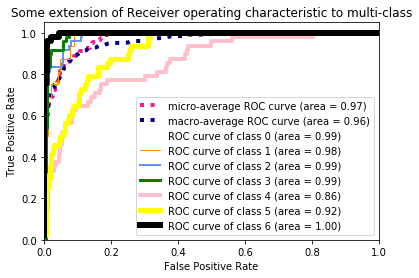

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
ytrain = label_binarize(ytrain, classes=[0,1,2,3,4,5,6])
n_classes = ytrain.shape[1]
y_val = label_binarize(yval, classes=[0,1,2,3,4,5,6])
n_classes = y_val.shape[1]

classifier = OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty='l1',solver='liblinear'))
score=classifier.fit(xtrain, ytrain).decision_function(xval)
pred=classifier.predict(xval)

fprnaive = dict()
tpr1 = dict()
roc_auc = dict()
for i in range(n_classes):
    fprnaive[i], tpr1[i], _ = roc_curve(y_val[:, i], score[:, i])
    roc_auc[i] = auc(fprnaive[i], tpr1[i])

# Compute micro-average ROC curve and ROC area
fprnaive["micro"], tpr1["micro"], _ = roc_curve(y_val.ravel(), score.ravel())
roc_auc["micro"] = auc(fprnaive["micro"], tpr1["micro"])
all_fprnaive = np.unique(np.concatenate([fprnaive[i] for i in range(n_classes)]))
mean_tpr1 = np.zeros_like(all_fprnaive)
for i in range(n_classes):
    mean_tpr1 += interp(all_fprnaive, fprnaive[i], tpr1[i])

mean_tpr1 /= n_classes
fprnaive["macro"] = all_fprnaive
tpr1["macro"] = mean_tpr1
roc_auc["macro"] = auc(fprnaive["macro"], tpr1["macro"])
                    
plt.figure()
plt.plot(fprnaive["micro"], tpr1["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fprnaive["macro"], tpr1["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','pink','yellow','black'])
lw=[0,1,2,3,4,5,6]
for i, color in zip(range(n_classes), colors):
    plt.plot(fprnaive[i], tpr1[i], color=color, lw=lw[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.plot([2, 2], [2, 2], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Repeat 1(f)i using a Nave Bayes' classier. Use both Gaussian and Multinomial
priors and compare the results.

In [802]:
column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"]
dataset={}
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []

dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'AReMtrain\{0}'.format(activity)
    for filename in os.listdir(path):
        
        path1 = 'AReMtrain\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
                   
        for coll in column:
            dataset[coll+"_"+"mean"].append(np.mean(df[coll]))
            dataset[coll+"_"+"median"].append(np.median(df[coll]))
            dataset[coll+"_"+"max"].append(np.max(df[coll]))
        dataset["activity"].append(activity)
train = pd.DataFrame(dataset)
#train['activity'] = np.where(((train['activity'] == 'bending1')|(train['activity'] == 'bending2')),'bending','others')  
#train = train.sample(frac=1,random_state=150).reset_index(drop=True)
Xtrain = train.loc[:,train.columns!='activity']
ytrain = train['activity']




# test

column = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameter = ["mean","median","max"]
dataset={}
for x in column:
    for p in parameter:
        dataset[x+"_"+p] = []

dataset["activity"] = []
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path = 'AReMtest\{0}'.format(activity)
    for filename in os.listdir(path):
        
        path1 = 'AReMtest\{0}\{1}'.format(activity,filename)
        df= pd.read_csv(path1,skiprows=4,usecols=range(0,7))
                   
        for coll in column:
            dataset[coll+"_"+"mean"].append(np.mean(df[coll]))
            dataset[coll+"_"+"median"].append(np.median(df[coll]))
            dataset[coll+"_"+"max"].append(np.max(df[coll]))
        dataset["activity"].append(activity)
test = pd.DataFrame(dataset)
#test['activity'] = np.where(((test['activity'] == 'bending1')|(test['activity'] == 'bending2')),'bending','others')  
#test = test.sample(frac=1,random_state=123).reset_index(drop=True)
Xtest = test.loc[:,test.columns!='activity']
ytest = test['activity']
 

In [803]:
ypgus=[]
ytgus=[]
ypgus=[]
ytgus=[]

activities ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
gausnaive= GaussianNB() 

g=gausnaive.fit(Xtrain, ytrain)
g_pred=g.predict(Xtest)
for i in list(g_pred):
    ypgus.append(activities[i])
for i in list(ytest):
    ytgus.append(activities[i])

In [804]:
cnfgau=confusion_matrix(ytgus, ypgus)
cnfgau

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 3]], dtype=int64)

In [805]:
ytmulti=[]
ytmul=[]

activities ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
mulnaive = MultinomialNB() 

mnb=mulnaive.fit(Xtrain, ytrain)
mnbp=mnb.predict(Xtest)
for i in list(mnbp):
    ytmulti.append(activities[i])
for i in list(ytest):
    ytmul.append(activities[i])

In [ ]:
cnfmulti=confusion_matrix(ytmulti, ytmul)
cnfgau

In [811]:
print("Accuracy of the Gaussian Navie base ")
gausaccu= g.score(Xtest, ytest)
print(gausaccu)
print("Accuracy of the Multinomial Naive base ")
accumult= mnb.score(Xtest, ytest)
print(accumult)

Accuracy of the Gaussian Navie base 
0.9473684210526315
Accuracy of the Multinomial Naive base 
1.0


# Which method is better for multi-class classication in this problem?

#### From the above accuracies  we conclude that the Multinomial Navie base is the better method for multi- class classification